In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow import keras

In [2]:
i1 = Image.open("/app/_data/src/test_images/85f8cb619c66b863.jpg").resize((224, 224))
n1 = np.array(i1).astype(np.uint8)

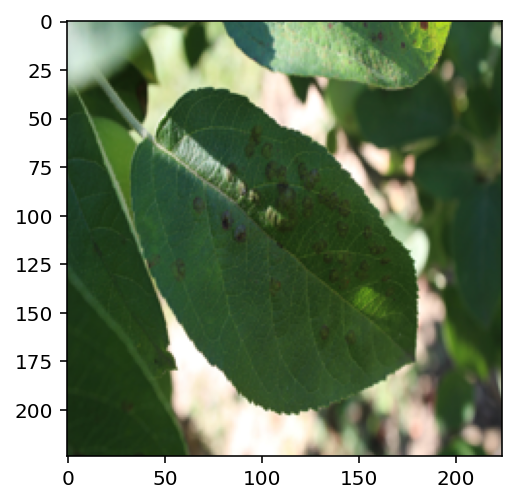

In [3]:
plt.imshow(n1)

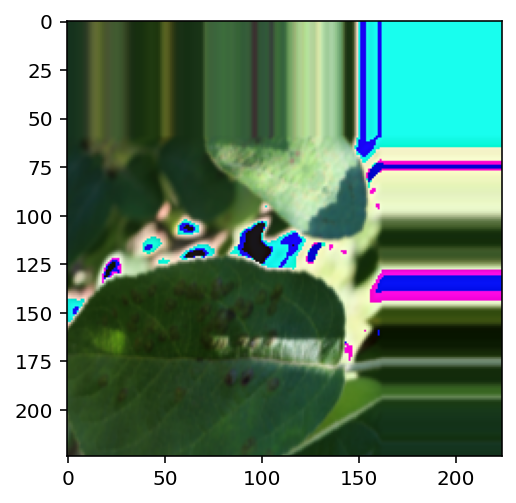

In [63]:
input_l = keras.layers.Input(shape=n1.shape)
x = input_l
x = keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(x)
x = keras.layers.experimental.preprocessing.RandomRotation(0.5)(x)
x = keras.layers.experimental.preprocessing.RandomZoom(
    height_factor=(0.5, -0.5), width_factor=(0.5, -0.5), fill_mode="nearest"
)(x)
x = keras.layers.experimental.preprocessing.RandomContrast(factor=0.25)(x)
x = keras.layers.experimental.preprocessing.RandomTranslation(
    height_factor=0.33, width_factor=0.33, fill_mode="nearest"
)(x)

model = keras.Model(inputs=[input_l], outputs=[x])
model.build(input_shape=input_l.shape)

r1 = np.array(model(np.array([n1])))[0]
plt.imshow(r1.astype(np.uint8))

(224, 224, 3)